**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os

**Get the Files**

In [3]:
# useful directories
base_dir= 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\21cm Radio Astrophysics\\'

dir_data = base_dir + '\\Data\\11-17-2021'
dir_plot = base_dir + '\\Paper and Presentation'

**Read in the Grid Scan Data**

In [4]:
os.chdir(dir_data)

In [6]:
# run 1
f1 = open('grid_scan_1.rad', 'r')
lines1 = f1.readlines()

# run 2
f2 = open('grid_scan_2.rad', 'r')
lines2 = f2.readlines()

Get the az and el offsets

In [16]:
# run 1
azoffs1 = []
eloffs1 = []
temps1 = []

for line in lines1[7:56][::2]:
    vals = line.split()
    azoff = float(vals[3])
    eloff = float(vals[4])
    freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    
    azoffs1.append(azoff)
    eloffs1.append(eloff)
    temps1.append(np.average(nums))

In [17]:
# run 2
azoffs2 = []
eloffs2 = []
temps2 = []

for line in lines2[7:][::2]:
    vals = line.split()
    azoff = float(vals[3])
    eloff = float(vals[4])
    freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    
    azoffs2.append(azoff)
    eloffs2.append(eloff)
    temps2.append(np.average(nums))

In [18]:
azoffs2

[-7.0,
 -3.5,
 0.0,
 3.5,
 7.0,
 -7.0,
 -3.5,
 0.0,
 3.5,
 7.0,
 -7.0,
 -3.5,
 0.0,
 3.5,
 7.0,
 -7.0,
 -3.5,
 0.0,
 3.5,
 7.0,
 -7.0,
 -3.5,
 0.0,
 3.5,
 7.0]

In [19]:
eloffs2

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0]

In [53]:
# combine the coordinate offsets and temperatures
azoffs = azoffs1 + azoffs2
eloffs = eloffs1 + eloffs2
temps = temps1 + temps2

In [39]:
coords = list(zip(azoffs, eloffs))

**Make Plots of the Data**

In [27]:
# plot parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')

Text(0, 0.5, 'Elevation Offset [Degrees]')

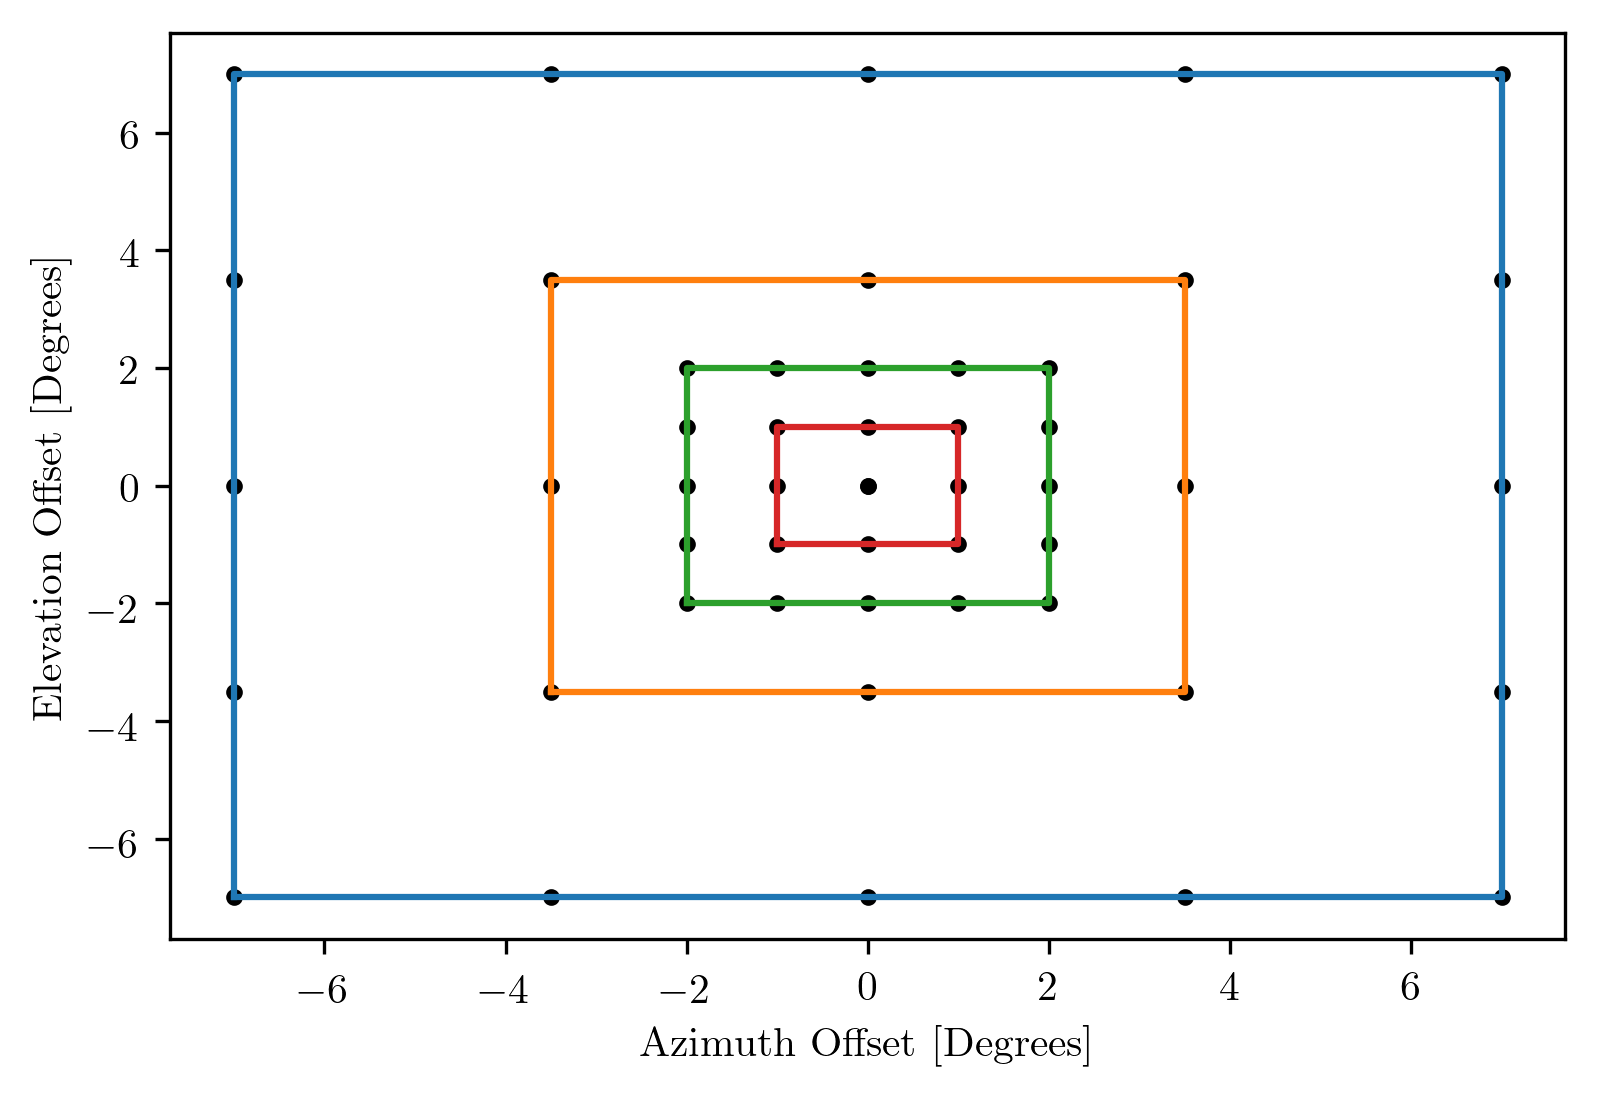

In [34]:
# plot the grid points
plt.scatter(azoffs, eloffs, color='black', marker='.')

# plot the squares
plt.plot([-7,7,7,7,7,-7,-7,-7],[-7,-7,-7,7,7,7,7,-7])
plt.plot([-3.5,3.5,3.5,3.5,3.5,-3.5,-3.5,-3.5], [-3.5,-3.5,-3.5,3.5,3.5,3.5,3.5,-3.5])
plt.plot([-2,2,2,2,2,-2,-2,-2], [-2,-2,-2,2,2,2,2,-2])
plt.plot([-1,1,1,1,1,-1,-1,-1], [-1,-1,-1,1,1,1,1,-1])

plt.xlabel('Azimuth Offset [Degrees]')
plt.ylabel('Elevation Offset [Degrees]')

In [42]:
coords

[(-2.0, -2.0),
 (-1.0, -2.0),
 (0.0, -2.0),
 (1.0, -2.0),
 (2.0, -2.0),
 (-2.0, -1.0),
 (-1.0, -1.0),
 (0.0, -1.0),
 (1.0, -1.0),
 (2.0, -1.0),
 (-2.0, 0.0),
 (-1.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (2.0, 0.0),
 (-2.0, 1.0),
 (-1.0, 1.0),
 (0.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (-2.0, 2.0),
 (-1.0, 2.0),
 (0.0, 2.0),
 (1.0, 2.0),
 (2.0, 2.0),
 (-7.0, -7.0),
 (-3.5, -7.0),
 (0.0, -7.0),
 (3.5, -7.0),
 (7.0, -7.0),
 (-7.0, -3.5),
 (-3.5, -3.5),
 (0.0, -3.5),
 (3.5, -3.5),
 (7.0, -3.5),
 (-7.0, 0.0),
 (-3.5, 0.0),
 (0.0, 0.0),
 (3.5, 0.0),
 (7.0, 0.0),
 (-7.0, 3.5),
 (-3.5, 3.5),
 (0.0, 3.5),
 (3.5, 3.5),
 (7.0, 3.5),
 (-7.0, 7.0),
 (-3.5, 7.0),
 (0.0, 7.0),
 (3.5, 7.0),
 (7.0, 7.0)]

In [56]:
temps.index(max(temps))

29

In [61]:
temps[coords.index((-1,-1))] 

180.203125

Text(0, 0.5, 'Elevation Offset [Degrees]')

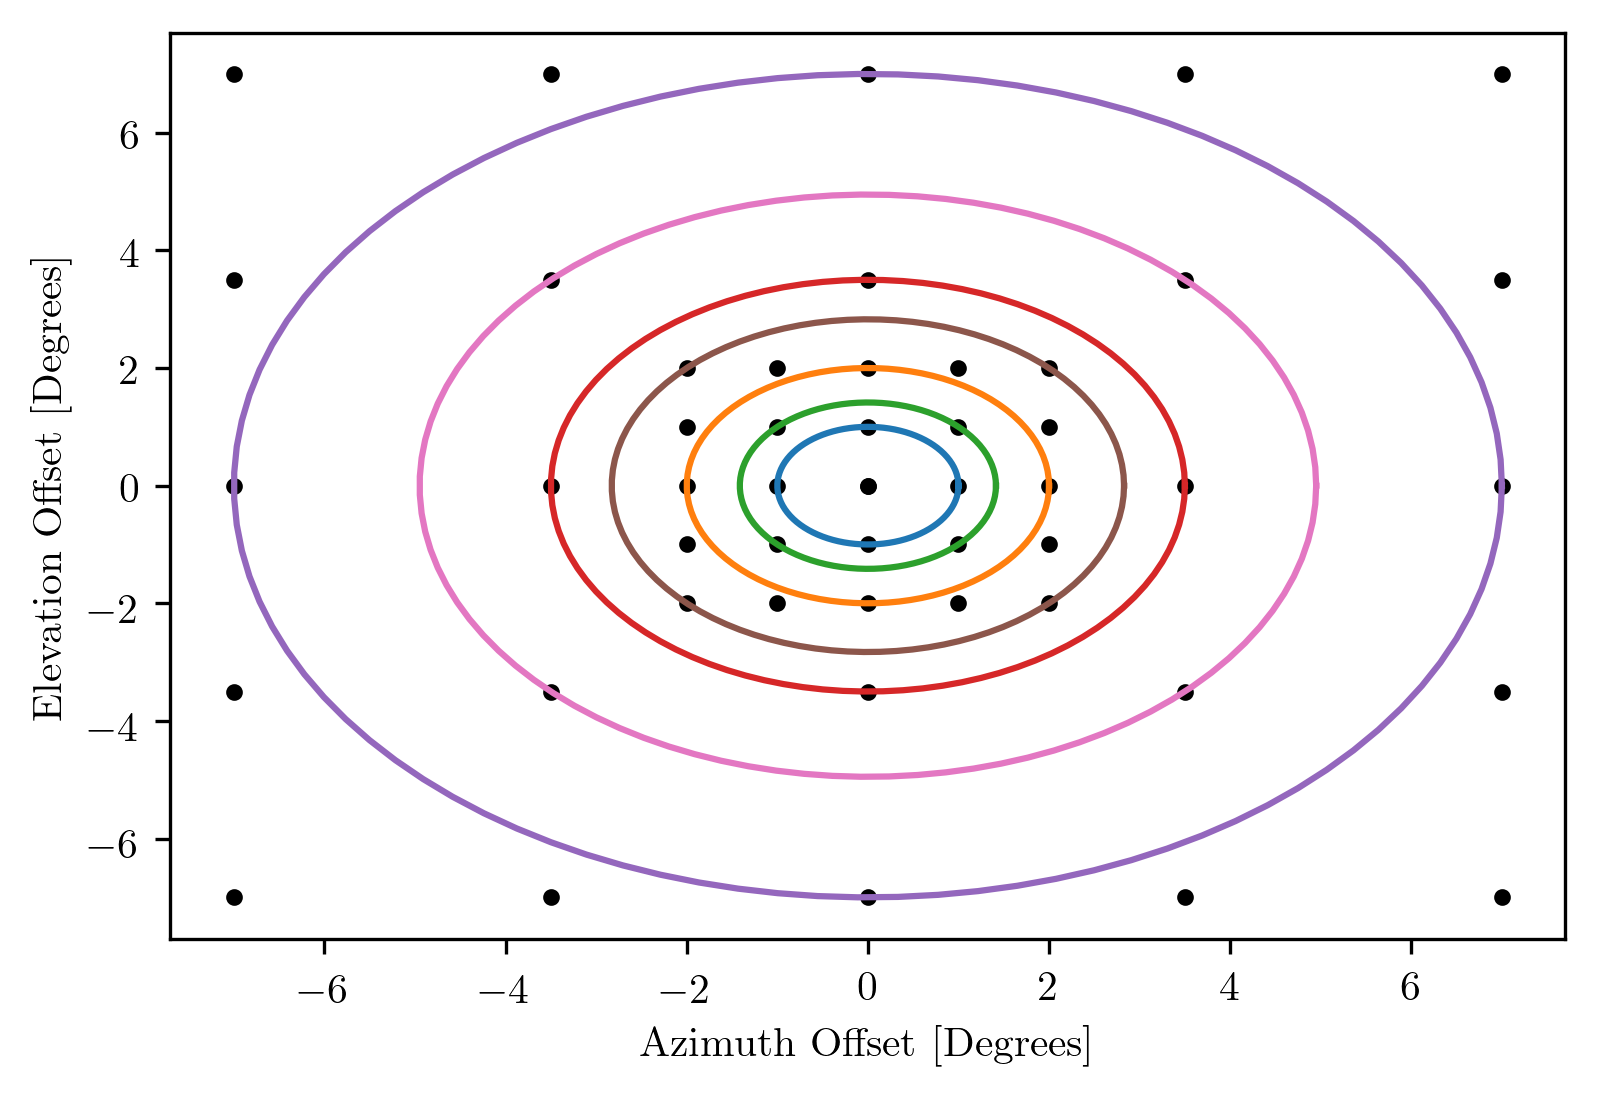

In [52]:
# plot the grid points
plt.scatter(azoffs, eloffs, color='black', marker='.')

# plot the circles
thetas = np.linspace(0,2*np.pi, 100)

plt.plot(np.cos(thetas), np.sin(thetas))
plt.plot(2*np.cos(thetas), 2*np.sin(thetas))
plt.plot(np.sqrt(2)*np.cos(thetas), np.sqrt(2)*np.sin(thetas))
plt.plot(3.5*np.cos(thetas), 3.5*np.sin(thetas))
plt.plot(7*np.cos(thetas), 7*np.sin(thetas))
plt.plot(np.sqrt(8)*np.cos(thetas), np.sqrt(8)*np.sin(thetas))
plt.plot(np.sqrt(24.5)*np.cos(thetas), np.sqrt(24.5)*np.sin(thetas))

plt.xlabel('Azimuth Offset [Degrees]')
plt.ylabel('Elevation Offset [Degrees]')